In [1]:
pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.4 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, BaggingRegressor, StackingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, make_scorer
from joblib import dump, load
from sklearn.linear_model import LogisticRegression, LinearRegression
import math
import requests
import unidecode
from bs4 import BeautifulSoup
from googlesearch import search
import warnings
warnings.filterwarnings("ignore")

# Подготовка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
recipes = pd.read_csv('/content/drive/MyDrive/Школа 21/DS_project 15 Создание прототипа рекомендательного сервиса рецептов/epi_r.csv')
recipes

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = pd.DataFrame(recipes.columns)
df

,0
0,title
1,rating
2,calories
3,protein
4,fat
...,...
675,cookbooks
676,leftovers
677,snack
678,snack week


In [ ]:
#сохранила в excel чтобы открыть поизучать
df.to_excel('/content/drive/MyDrive/Школа 21/epi_r.xls')

In [ ]:
recipes.shape

(20052, 680)

In [ ]:
#отбираем нужные колонки
selected_columns = [
'title','rating','calories','protein','fat','sodium','breakfast','lunch','dinner','almond','amaretto','anchovy','anise','apple',
'apple juice','apricot','artichoke','arugula','asian pear','asparagus','aspen','avocado','bacon','banana','barley','basil',
'bass','bean','beef','beef rib','beef shank','beef tenderloin','beer','beet','bell pepper','blackberry','blue cheese',
'blueberry','bok choy','bourbon','bran','brandy','bread','breadcrumbs','brie','brisket','broccoli','broccoli rabe','brown rice',
'brussel sprout','bulgur','butter','buttermilk','cabbage','cantaloupe','capers','caraway','cardamom','carrot','cashew',
'cauliflower','caviar','celery','champagne','cheddar','cheese','cherry','chestnut','chicken','chickpea','chile pepper',
'chocolate','cilantro','cinnamon','clam','clove','coconut','cod','coffee','collard greens','coriander','corn','cornmeal',
'cottage cheese','crab','cranberry','cranberry sauce','cream cheese','cucumber','cumin','currant','curry','dill','duck','egg',
'eggplant','fennel','feta','fig','fortified wine','garlic','gin','goat cheese','goose','gouda','grape','grapefruit',
'green bean','green onion/scallion','ground beef','ground lamb','guava','halibut','ham','hazelnut','honey','horseradish',
'hot pepper','jerusalem artichoke','kirsch','kiwi','lamb','lamb shank','leek','lemon','lemon juice','lemongrass','lentil',
'lettuce','lima bean','lime juice','lingonberry','lobster','lychee','macadamia nut','mango','maple syrup','martini',
'mayonnaise','melon','milk/cream','mint','mozzarella','mushroom','mussel','mustard','mustard greens','nectarine','noodle',
'nut','nutmeg','oat','octopus','olive','onion','orange','orange juice','oregano','oyster','papaya','paprika','parmesan',
'parsley','parsnip','passion fruit','pasta','pea','peach','peanut','peanut butter','pear','pecan','pepper','persimmon',
'phyllo/puff pastry dough','pickles','pine nut','pineapple','pistachio','plum','pomegranate','pomegranate juice','poppy','pork',
'pork chop','pork rib','pork tenderloin','potato','prosciutto','prune','pumpkin','quail','quiche','quince','quinoa','rabbit',
'radicchio','radish','raisin','raspberry','red wine','rhubarb','rice','ricotta','rosemary','rum','rutabaga','rye','saffron',
'sage','sake','salad','salmon','sangria','sardine','sausage','scallop','scotch','seafood','semolina','sesame','sesame oil',
'shallot','shellfish','sherry','shrimp','sour cream','sourdough','soy','soy sauce','sparkling wine','spinach','squash','squid',
'stew','strawberry','sweet potato/yam','swiss cheese','swordfish','taco','tamarind','tangerine','tapioca','tarragon','tea',
'tequila','thyme','tilapia','tofu','tomatillo','tomato','tortillas','trout','tuna','turnip','vanilla','veal','venison',
'vermouth','vinegar','vodka','walnut','wasabi','watercress','watermelon','whiskey','white wine','wild rice','wine',
'yellow squash','yogurt','yuca','zucchini','turkey'
]
len(selected_columns)

274

In [ ]:
recipes = recipes[selected_columns]
recipes

,title,rating,calories,protein,fat,sodium,breakfast,lunch,dinner,almond,...,watermelon,whiskey,white wine,wild rice,wine,yellow squash,yogurt,yuca,zucchini,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
recipes = recipes.rename(columns={'green onion/scallion': 'green onion',
                   'milk/cream': 'milk',
                   'sweet potato/yam': 'sweet potato',
                   'phyllo/puff pastry dough': 'phyllo'
                  })

In [ ]:
df = recipes.drop(columns=['title','calories','protein','fat','sodium','breakfast','lunch','dinner'])
df

,rating,almond,amaretto,anchovy,anise,apple,apple juice,apricot,artichoke,arugula,...,watermelon,whiskey,white wine,wild rice,wine,yellow squash,yogurt,yuca,zucchini,turkey
0,2.500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.duplicated().sum()

4532

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(15520, 266)

In [ ]:
sum(df.drop(columns=['rating']).apply(sum, axis=1) == 0.0)

8

In [ ]:
df = df[df.drop(columns=['rating']).apply(sum, axis=1) != 0.0]

In [ ]:
df.shape

(15512, 266)

In [ ]:
df.rating.value_counts(normalize=True).sort_index()

0.000    0.080905
1.250    0.008961
1.875    0.006704
2.500    0.028752
3.125    0.079358
3.750    0.261797
4.375    0.404332
5.000    0.129190
Name: rating, dtype: float64

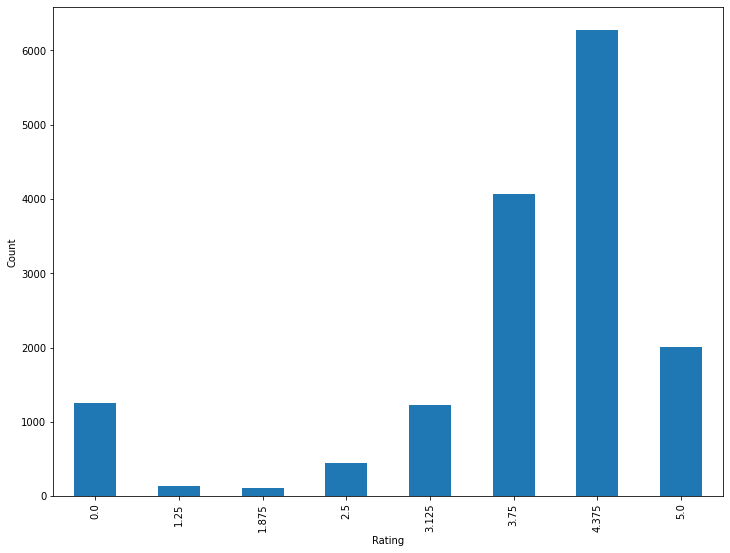

In [ ]:
df.rating.value_counts().sort_index().plot(kind='bar', xlabel='Rating', ylabel='Count', figsize=(12, 9));

In [ ]:
df.to_csv('/content/drive/MyDrive/Школа 21/DS_project 15 Создание прототипа рекомендательного сервиса рецептов/df.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Школа 21/DS_project 15 Создание прототипа рекомендательного сервиса рецептов/df.csv')

# Прогноз

## Регрессия

In [ ]:
X = df.drop(columns=['rating'])
y = df['rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [ ]:
y_train.value_counts(normalize=True).sort_index()

0.000    0.080909
1.250    0.008945
1.875    0.006689
2.500    0.028769
3.125    0.079378
3.750    0.261826
4.375    0.404303
5.000    0.129180
Name: rating, dtype: float64

In [ ]:
y_test.value_counts(normalize=True).sort_index()

0.000    0.080889
1.250    0.009024
1.875    0.006768
2.500    0.028682
3.125    0.079278
3.750    0.261682
4.375    0.404447
5.000    0.129230
Name: rating, dtype: float64

### LinearRegression

In [ ]:
param_grid = {'fit_intercept': (True, False)}

lin_reg = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
lin_reg.fit(X_train, y_train)
lin_reg.best_params_, lin_reg.best_score_

({'fit_intercept': True}, -1.2438508045243408e+22)

In [ ]:
print('RMSE LinearRegression на тестовой подвыборке:', math.sqrt(mean_squared_error(y_test, lin_reg.best_estimator_.predict(X_test))))

RMSE LinearRegression на тестовой подвыборке: 1.2387249807151004


In [ ]:
#lin_reg_best = LinearRegression(fit_intercept = True)
#print('RMSE LinearRegression на тестовой подвыборке:', cross_val_score(lin_reg_best, X_test, y_test, cv=10, scoring='neg_mean_squared_error').mean())

RMSE LinearRegression на тестовой подвыборке: -7.165845234176245e+24


### DecisionTreeRegressor

In [ ]:
param_grid = {'max_depth' : range(1, 100)}

tree_reg = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, n_jobs=-1, cv=5, scoring='neg_mean_squared_error') 
tree_reg.fit(X_train, y_train) 
tree_reg.best_params_, tree_reg.best_score_

({'max_depth': 2}, -1.6174855208077745)

In [ ]:
print('RMSE DecisionTreeRegressor на тестовой подвыборке:', math.sqrt(mean_squared_error(y_test, tree_reg.best_estimator_.predict(X_test))))

RMSE DecisionTreeRegressor на тестовой подвыборке: 1.270514577302714


### RandomForestRegressor

In [ ]:
param_grid = {'n_estimators' : range(10, 101, 10),
              'max_depth' : (1, 5, 10, 50, 100),
              'max_features' : (5, 10, 50, 100)}
forest_reg = GridSearchCV(estimator=RandomForestRegressor(random_state=21),
                      param_grid=param_grid, 
                      cv=5,
                      scoring='neg_mean_squared_error', 
                      n_jobs=-1)
forest_reg.fit(X_train, y_train)
forest_reg.best_params_, forest_reg.best_score_

({'max_depth': 10, 'max_features': 50, 'n_estimators': 100},
 -1.5889910304784336)

In [ ]:
print('RMSE RandomForestRegressor на тестовой подвыборке:', math.sqrt(mean_squared_error(y_test, forest_reg.best_estimator_.predict(X_test))))

RMSE RandomForestRegressor на тестовой подвыборке: 1.25615848495156


### SVR

In [ ]:
param_grid = {'kernel': ('poly', 'rbf', 'sigmoid'),
              'gamma': ('scale', 'auto'),
              'C': (0.1, 1, 10)}
svr = GridSearchCV(estimator=SVR(),
                      param_grid=param_grid, 
                      cv=5,
                      scoring='neg_mean_squared_error')
svr.fit(X_train, y_train)
svr.best_params_, svr.best_score_

({'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, -1.7016849608428894)

In [ ]:
print('RMSE SVR на тестовой подвыборке:', math.sqrt(mean_squared_error(y_test, svr.best_estimator_.predict(X_test))))

RMSE SVR на тестовой подвыборке: 1.3017944436276825


### GradientBoostingRegressor

In [ ]:
param_grid = {'n_estimators' : range(10, 101, 10),
              'max_depth' : (1, 2, 5, 10, 15, 20)}
gboost_reg = GridSearchCV(estimator=GradientBoostingRegressor(random_state=21),
                      param_grid=param_grid, 
                      cv=5,
                      scoring='neg_mean_squared_error', 
                      n_jobs=-1)
gboost_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=21),
             n_jobs=-1,
             param_grid={'max_depth': (1, 2, 5, 10, 15, 20),
                         'n_estimators': range(10, 101, 10)},
             scoring='neg_mean_squared_error')

In [ ]:
gboost_reg.best_params_, gboost_reg.best_score_

({'max_depth': 2, 'n_estimators': 100}, -1.5824737179539747)

In [ ]:
print('RMSE GradientBoostingRegressor на тестовой подвыборке:', math.sqrt(mean_squared_error(y_test, gboost_reg.best_estimator_.predict(X_test))))

RMSE GradientBoostingRegressor на тестовой подвыборке: 1.251648674424281


### VotingRegressor

In [ ]:
best_RMSE = np.inf
best_params = 0
for weight_1 in range(1, 3):
      for weight_2 in range(1, 3):
        for weight_3 in range(1, 3):
            vr = VotingRegressor(estimators=[('SVR', SVR(C=1,
                                                         gamma='scale',
                                                         kernel='rbf')),
                                             ('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=2)),
                                             ('RandomForestRegressor', RandomForestRegressor(random_state=21, 
                                                                                             max_depth=10,
                                                                                             max_features=50,
                                                                                             n_estimators=100, 
                                                                                             n_jobs=-1))],
                                 weights=[weight_1, weight_2, weight_3],
                                 n_jobs=-1)
            RMSE = math.sqrt(abs(cross_val_score(vr, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()))
            if RMSE < best_RMSE:
                best_RMSE = RMSE
                best_params = {'weights': [weight_1, weight_2, weight_3]}


print(f'Best params: {best_params}, RMSE is {best_RMSE}')

Best params: {'weights': [1, 1, 2]}, RMSE is 1.262857713732354


In [ ]:
vr = VotingRegressor(estimators=[('SVR', SVR(C=1, 
                                             gamma='scale', 
                                             kernel='rbf')),
                                               ('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=2)),
                                               ('RandomForestRegressor', RandomForestRegressor(random_state=21, 
                                                                                               max_depth=5, 
                                                                                               n_estimators=100, 
                                                                                               n_jobs=-1))],
                                   weights=[1, 1, 2],
                                   n_jobs=-1)
vr.fit(X_train, y_train)
print('RMSE VotingRegressor на тестовой подвыборке:', math.sqrt(mean_squared_error(y_test, vr.predict(X_test))))

RMSE VotingRegressor на тестовой подвыборке: 1.2620493861319557


### BaggingRegressor

In [ ]:
best_RMSE = np.inf
best_n_estimators = 0
for n_estimators in (1, 2, 5, 10):
    br = BaggingRegressor(base_estimator=SVR(C=1, gamma='scale', kernel='rbf'), 
                          n_estimators=n_estimators, 
                          random_state=21, 
                          n_jobs=-1)
    RMSE = math.sqrt(abs(cross_val_score(br, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()))
    print(f'n_estimators: {n_estimators}, RMSE is {RMSE}')
    if RMSE < best_RMSE:
        best_RMSE = RMSE
        best_n_estimators = n_estimators

print(f'Best n_estimators: {best_n_estimators}, RMSE is {best_RMSE}')

n_estimators: 1, RMSE is 1.3103631554731459
n_estimators: 2, RMSE is 1.3057079424180533
n_estimators: 5, RMSE is 1.2975045265046439
n_estimators: 10, RMSE is 1.2959717522793626
Best n_estimators: 10, RMSE is 1.2959717522793626


In [ ]:
br = BaggingRegressor(base_estimator=SVR(C=1, gamma='scale', kernel='rbf'), 
                      n_estimators=10, 
                      random_state=21, 
                      n_jobs=-1)
br.fit(X_train, y_train)
print('RMSE BaggingRegressor на тестовой подвыборке:', math.sqrt(mean_squared_error(y_test, br.predict(X_test))))

RMSE BaggingRegressor на тестовой подвыборке: 1.2879614065248797


### StackingRegressor

In [ ]:
best_RMSE = np.inf
best_passthrough = True
for passthrough in [True, False]:
    sr = StackingRegressor(estimators=[('SVR', SVR(C=1, gamma='scale', kernel='rbf')),
                                       ('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=2)),
                                       ('RandomForestRegressor', RandomForestRegressor(random_state=21, 
                                                                                             max_depth=10,
                                                                                             max_features=50,
                                                                                             n_estimators=100, 
                                                                                             n_jobs=-1))],
                           final_estimator=LinearRegression(),
                           cv=5, 
                           passthrough=passthrough, n_jobs=-1)
    sr.fit(X_train, y_train)
    RMSE = math.sqrt(mean_squared_error(y_train, sr.predict(X_train)))
    if RMSE < best_RMSE:
        best_RMSE = RMSE
        best_passthrough = passthrough

print(f'Best passthrough: {best_passthrough}, RMSE is {best_RMSE}')

Best passthrough: False, RMSE is 1.1762972489119579


In [ ]:
sr = StackingRegressor(estimators=[('SVR', SVR(C=1, gamma='scale', kernel='rbf')),
                                   ('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=2)),
                                   ('RandomForestRegressor', RandomForestRegressor(random_state=21, 
                                                                                   max_depth=5, 
                                                                                   n_estimators=100, 
                                                                                   n_jobs=-1))],
                       final_estimator=LinearRegression(),
                       passthrough=True, 
                       n_jobs=-1)
sr.fit(X_train, y_train)
print('RMSE StackingRegressor на тестовой подвыборке:', math.sqrt(mean_squared_error(y_test, sr.predict(X_test))))

RMSE StackingRegressor на тестовой подвыборке: 1.2390990288653385


### Наивный регрессор

In [ ]:
y_pred = np.full(len(y_test), y_train.mean())
print(f'RMSE наивного регрессора на тестовой подвыборке: {math.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE наивного регрессора на тестовой подвыборке: 1.2858057380411216


### Лучший регрессор

StackingRegressor с параметрами {estimators=

[('SVR', SVR(C=1, gamma='scale', kernel='rbf')),

  ('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=2)),

  ('RandomForestRegressor', RandomForestRegressor(random_state=21,       max_depth=5,                                                                  n_estimators=100,                                                               n_jobs=-1))],
                       
final_estimator=LinearRegression(),

passthrough=True, 

n_jobs=-1},

и RMSE = 1.2390990288653385

## Классификация 6 классов

In [ ]:
X = df.drop(columns=['rating'])
y = df['rating'].round()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [ ]:
y_train.value_counts(normalize=True).sort_index()

0.0    0.080909
1.0    0.008945
2.0    0.035458
3.0    0.079378
4.0    0.666129
5.0    0.129180
Name: rating, dtype: float64

In [ ]:
y_test.value_counts(normalize=True).sort_index()

0.0    0.080889
1.0    0.009024
2.0    0.035450
3.0    0.079278
4.0    0.666130
5.0    0.129230
Name: rating, dtype: float64

### LogisticRegression

In [ ]:
param_grid = {'penalty': ('l1', 'l2', 'elasticnet', 'none'),
              'C': (0.1, 1, 10),
              'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
              'l1_ratio': [0.5],
              'fit_intercept': (True, False)}

log_reg = GridSearchCV(estimator=LogisticRegression(random_state=21, n_jobs=-1),
                       param_grid=param_grid,
                       cv=5,
                       n_jobs=-1)
log_reg.fit(X_train, y_train)
log_reg.best_params_, log_reg.best_score_

({'C': 1,
  'fit_intercept': True,
  'l1_ratio': 0.5,
  'penalty': 'l1',
  'solver': 'saga'},
 0.7975662577896607)

In [ ]:
print('Accuracy LogisticRegression на тестовой подвыборке:', accuracy_score(y_test, log_reg.best_estimator_.predict(X_test)))

Accuracy LogisticRegression на тесте: 0.7995488237189816


### DecisionTreeClassifier

In [ ]:
param_grid = {'max_depth' : range(1, 100)}
dt_clf = GridSearchCV(estimator=DecisionTreeClassifier(), 
                      param_grid=param_grid,
                      n_jobs=-1,
                      cv=5)
dt_clf.fit(X_train, y_train)
dt_clf.best_params_, dt_clf.best_score_

({'max_depth': 3}, 0.6699171560426527)

In [ ]:
print('Accuracy DecisionTreeClassifier на тестовой подвыборке:', accuracy_score(y_test, dt_clf.best_estimator_.predict(X_test)))

Accuracy DecisionTreeClassifier на тестовой подвыборке: 0.6680631646793426


### RandomForestClassifier

In [ ]:
param_grid = {'n_estimators' : range(10, 101, 10),
              'max_depth' : (1, 2, 5, 10, 15, 20)}
rf_clf = GridSearchCV(estimator=RandomForestClassifier(random_state=21),
                      param_grid=param_grid, 
                      cv=5, 
                      n_jobs=-1)
rf_clf.fit(X_train, y_train)
rf_clf.best_params_, rf_clf.best_score_

({'max_depth': 20, 'n_estimators': 70}, 0.6690308065715229)

In [ ]:
print('Accuracy RandomForestClassifier на тестовой подвыборке:', accuracy_score(y_test, rf_clf.best_estimator_.predict(X_test)))

Accuracy RandomForestClassifier на тестовой подвыборке: 0.6677408959071865


### SVC

In [ ]:
param_grid = {'kernel': ('poly', 'rbf', 'sigmoid'),
              'gamma': ('scale', 'auto'),
              'C': (0.1, 1, 10)}
svc = GridSearchCV(estimator=SVC(),
                      param_grid=param_grid, 
                      cv=5)
svc.fit(X_train, y_train)
svc.best_params_, svc.best_score_

({'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, 0.7977274506231241)

In [ ]:
print('Accuracy SVC на тестовой подвыборке:', accuracy_score(y_test, svc.best_estimator_.predict(X_test)))

Accuracy SVC на тестовой подвыборке: 0.7966484047695779


### VotingClassifier

In [ ]:
best_accuracy = 0
best_params = 0
for voting in ('hard', 'soft'):
    for weight_1 in range(1, 3):
        for weight_2 in range(1, 3):
            for weight_3 in range(1, 3):
                vc = VotingClassifier(estimators=[('SVC', SVC(C=1, 
                                                              gamma='scale', 
                                                              kernel='rbf')),
                                                  ('LogisticRegression', LogisticRegression(C=1,
                                                                                            fit_intercept=True,
                                                                                            l1_ratio=0.5,
                                                                                            penalty='l1',
                                                                                            solver='saga')),
                                                  ('RandomForestClassifier', RandomForestClassifier(random_state=21, 
                                                                                                    max_depth=15, 
                                                                                                    n_estimators=100, 
                                                                                                    n_jobs=-1))],
                                      weights=[weight_1, weight_2, weight_3],
                                      n_jobs=-1)
                accuracy = cross_val_score(vc, X_train, y_train, cv=5).mean()
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'voting': voting, 'weights': [weight_1, weight_2, weight_3]}


print(f'Best params: {best_params}, accuracy is {best_accuracy}')

Best params: {'voting': 'hard', 'weights': [1, 2, 1]}, accuracy is 0.6715288895038231


In [ ]:
vc = VotingClassifier(estimators=[('SVC', SVC(C=1,
                                              gamma='scale',
                                              kernel='rbf')),
                                  ('LogisticRegression', LogisticRegression(C=1,
                                                                            fit_intercept=True,
                                                                            l1_ratio=0.5,
                                                                            penalty='l1',
                                                                            solver='saga')),
                                  ('RandomForestClassifier', RandomForestClassifier(random_state=21,
                                                                                    max_depth=15,
                                                                                    n_estimators=100, 
                                                                                    n_jobs=-1))],
                      weights=[1, 2, 2],
                      voting='hard',
                      n_jobs=-1)
vc.fit(X_train, y_train)
print('Accuracy VotingClassifier на тестовой подвыборке:', accuracy_score(y_test, vc.predict(X_test)))

Accuracy VotingClassifier на тестовой подвыборке: 0.6696745085401224


### BaggingClassifier

In [ ]:
best_accuracy = 0
best_n_estimators = 0
for n_estimators in (1, 2, 5, 10):
    bc = BaggingClassifier(base_estimator=SVC(C=1, gamma='scale', kernel='rbf'), 
                           n_estimators=n_estimators, 
                           random_state=21, 
                           n_jobs=-1)
    accuracy = cross_val_score(bc, X_train, y_train, cv=5).mean()
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f'Best n_estimators: {best_n_estimators}, accuracy is {best_accuracy}')

Best n_estimators: 2, accuracy is 0.6708036354294248


In [ ]:
bc = BaggingClassifier(base_estimator=SVC(C=1, gamma='scale', kernel='rbf'), 
                       n_estimators=2, 
                       random_state=21, 
                       n_jobs=-1)
bc.fit(X_train, y_train)
print('Accuracy BaggingClassifier на тестовой подвыборке:', accuracy_score(y_test, bc.predict(X_test)))

Accuracy BaggingClassifier на тестовой подвыборке: 0.6664518208185627


### Наивный классификатор

In [ ]:
y_pred = np.full(len(y_test), y_train.mode())
print(f'Accuracy наивного регрессора на тестовой подвыборке {accuracy_score(y_test, y_pred)}')

Accuracy наивного регрессора на тестовой подвыборке 0.6661295520464067


### Лучший классификатор

In [ ]:
print("SVC с параметрами {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, Accuracy = 0.6707474226804123")

## Классификация 3 классов (хорошо/средне/плохо)

In [ ]:
def binarize(y):
    if y in (0, 1):
        return 'bad'
    if y in (2, 3):
        return 'so-so'
    return 'great'

In [ ]:
X = df.drop(columns=['rating'])
y = df['rating'].round().apply(binarize)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [ ]:
y_train.value_counts(normalize=True).sort_index()

bad      0.089854
great    0.795310
so-so    0.114836
Name: rating, dtype: float64

In [ ]:
y_test.value_counts(normalize=True).sort_index()

bad      0.089913
great    0.795359
so-so    0.114728
Name: rating, dtype: float64

### LogisticRegression

In [ ]:
param_grid = {'penalty': ('l1', 'l2', 'elasticnet', 'none'),
              'C': (0.1, 1, 10),
              'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
              'l1_ratio': [0.5],
              'fit_intercept': (True, False)}

log_reg = GridSearchCV(estimator=LogisticRegression(random_state=21, n_jobs=-1),
                       param_grid=param_grid,
                       cv=5,
                       n_jobs=-1)
log_reg.fit(X_train, y_train)
log_reg.best_params_, log_reg.best_score_

({'C': 1,
  'fit_intercept': True,
  'l1_ratio': 0.5,
  'penalty': 'l1',
  'solver': 'saga'},
 0.7975662577896607)

In [ ]:
print('Accuracy LogisticRegression на тестовой подвыборке:', accuracy_score(y_test, log_reg.best_estimator_.predict(X_test)))

Accuracy LogisticRegression на тестовой подвыборке: 0.7995488237189816


### DecisionTreeClassifier

In [ ]:
param_grid = {'max_depth' : range(1, 100)}
dt_clf = GridSearchCV(estimator=DecisionTreeClassifier(), 
                      param_grid=param_grid,
                      n_jobs=-1,
                      cv=5)
dt_clf.fit(X_train, y_train)
dt_clf.best_params_, dt_clf.best_score_

({'max_depth': 1}, 0.797405097435108)

In [ ]:
print('Accuracy DecisionTreeClassifier на тестовой подвыборке:', accuracy_score(y_test, dt_clf.best_estimator_.predict(X_test)))

Accuracy DecisionTreeClassifier на тестовой подвыборке: 0.7966484047695779


### RandomForestClassifier

In [ ]:
param_grid = {'n_estimators' : range(10, 101, 10),
              'max_depth' : (1, 2, 5, 10, 15, 20)}
rf_clf = GridSearchCV(estimator=RandomForestClassifier(random_state=21),
                      param_grid=param_grid, 
                      cv=5, 
                      n_jobs=-1)
rf_clf.fit(X_train, y_train)
rf_clf.best_params_, rf_clf.best_score_

({'max_depth': 20, 'n_estimators': 70}, 0.7965991982256121)

In [ ]:
print('Accuracy RandomForestClassifier на тестовой подвыборке:', accuracy_score(y_test, rf_clf.best_estimator_.predict(X_test)))

Accuracy RandomForestClassifier на тестовой подвыборке: 0.7969706735417338


### SVC

In [ ]:
param_grid = {'kernel': ('poly', 'rbf', 'sigmoid'),
              'gamma': ('scale', 'auto'),
              'C': (0.1, 1, 10)}
svc = GridSearchCV(estimator=SVC(),
                      param_grid=param_grid, 
                      cv=5)
svc.fit(X_train, y_train)
svc.best_params_, svc.best_score_

({'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, 0.7977274506231241)

In [ ]:
print('Accuracy SVC на тестовой подвыборке:', accuracy_score(y_test, svc.best_estimator_.predict(X_test)))

Accuracy SVC на тестовой подвыборке: 0.7966484047695779


### GradientBoostingClassifier

In [ ]:
param_grid = {'n_estimators' : range(10, 101, 10),
              'max_depth' : (1, 2, 5, 10, 15, 20)}
gb_clf = GridSearchCV(estimator=GradientBoostingClassifier(random_state=21),
                      param_grid=param_grid, 
                      cv=5,
                      n_jobs=-1)
gb_clf.fit(X_train, y_train)
gb_clf.best_params_, gb_clf.best_score_

({'max_depth': 2, 'n_estimators': 80}, 0.7971633244243682)

In [ ]:
print('Accuracy GradientBoostingClassifier на тестовой подвыборке:', accuracy_score(y_test, gb_clf.best_estimator_.predict(X_test)))

Accuracy GradientBoostingClassifier на тестовой подвыборке: 0.7976152110860457


### VotingClassifier

In [ ]:
best_accuracy = 0
best_params = 0
for voting in ('hard', 'soft'):
    for weight_1 in range(1, 3):
        for weight_2 in range(1, 3):
            for weight_3 in range(1, 3):
                vc = VotingClassifier(estimators=[('SVC', SVC(C=1, 
                                                              gamma='scale', 
                                                              kernel='rbf')),
                                                  ('LogisticRegression', LogisticRegression(C=1,
                                                                                            fit_intercept=True,
                                                                                            l1_ratio=0.5,
                                                                                            penalty='l1',
                                                                                            solver='saga')),
                                                  ('RandomForestClassifier', RandomForestClassifier(random_state=21, 
                                                                                                    max_depth=15, 
                                                                                                    n_estimators=100, 
                                                                                                    n_jobs=-1))],
                                      weights=[weight_1, weight_2, weight_3],
                                      n_jobs=-1)
                accuracy = cross_val_score(vc, X_train, y_train, cv=5).mean()
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'voting': voting, 'weights': [weight_1, weight_2, weight_3]}

In [ ]:
vc = VotingClassifier(estimators=[('SVC', SVC(C=1,
                                              gamma='scale',
                                              kernel='rbf')),
                                  ('LogisticRegression', LogisticRegression(C=1,
                                                                            fit_intercept=True,
                                                                            l1_ratio=0.5,
                                                                            penalty='l1',
                                                                            solver='saga')),
                                  ('RandomForestClassifier', RandomForestClassifier(random_state=21,
                                                                                    max_depth=15, 
                                                                                    n_estimators=100, 
                                                                                    n_jobs=-1))],
                                      weights=[2, 1, 1],
                                      n_jobs=-1)
vc.fit(X_train, y_train)
print('Accuracy VotingClassifier на тестовой подвыборке:', accuracy_score(y_test, vc.predict(X_test)))

Accuracy VotingClassifier на тестовой подвыборке: 0.7969706735417338


### BaggingClassifier

In [ ]:
best_accuracy = 0
best_n_estimators = 0
for n_estimators in (1, 2, 5, 10):
    bc = BaggingClassifier(base_estimator=SVC(C=1, gamma='scale', kernel='rbf'), 
                           n_estimators=n_estimators, 
                           random_state=21, 
                           n_jobs=-1)
    accuracy = cross_val_score(bc, X_train, y_train, cv=5).mean()
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f'Best n_estimators: {best_n_estimators}, accuracy is {best_accuracy}')

Best n_estimators: 5, accuracy is 0.7978886759354982


In [ ]:
bc = BaggingClassifier(base_estimator=SVC(C=1, gamma='scale', kernel='rbf'),
                       n_estimators=10,
                       random_state=21,
                       n_jobs=-1)
bc.fit(X_train, y_train)
print('Accuracy BaggingClassifier на тестовой подвыборке:', accuracy_score(y_test, bc.predict(X_test)))

Accuracy BaggingClassifier на тестовой подвыборке: 0.7979374798582017


### StackingClassifier

In [ ]:
best_accuracy = 0
best_passthrough = True
for passthrough in [True, False]:
    sc = StackingClassifier(estimators=[('SVC', SVC(C=1,
                                                    gamma='scale',
                                                    kernel='rbf')),
                                        ('LogisticRegression', LogisticRegression(C=1,
                                                                                  fit_intercept=True,
                                                                                  l1_ratio=0.5,
                                                                                  penalty='l1',
                                                                                  solver='saga')),
                                        ('RandomForestClassifier', RandomForestClassifier(random_state=21,
                                                                                          max_depth=15,
                                                                                          n_estimators=100,
                                                                                          n_jobs=-1))],
                            final_estimator=DecisionTreeClassifier(),
                            cv=5,
                            passthrough=passthrough, 
                            n_jobs=-1)
    sc.fit(X_train, y_train)
    accuracy = accuracy_score(y_train, sc.predict(X_train))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_passthrough = passthrough

print(f'Best passthrough: {best_passthrough}, accuracy is {best_accuracy}')

Best passthrough: True, accuracy is 0.7069062777016681


In [ ]:
sc = StackingClassifier(estimators=[('SVC', SVC(C=1,
                                                gamma='scale',
                                                kernel='rbf')),
                                    ('LogisticRegression', LogisticRegression(C=1,
                                                                              fit_intercept=True,
                                                                              l1_ratio=0.5,
                                                                              penalty='l1',
                                                                              solver='saga')),
                                    ('RandomForestClassifier', RandomForestClassifier(random_state=21,
                                                                                      max_depth=15, 
                                                                                      n_estimators=100, 
                                                                                      n_jobs=-1))],
                      final_estimator=DecisionTreeClassifier(),
                      cv=5,
                      passthrough=True,
                      n_jobs=-1)
sc.fit(X_train, y_train)
print('Accuracy StackingClassifier на тестовой подвыборке:', accuracy_score(y_test, sc.predict(X_test)))

Accuracy StackingClassifier на тестовой подвыборке: 0.6674186271350306


### Наивный классификатор

In [ ]:
y_pred = np.full(len(y_test), y_train.mode())
print(f'Accuracy наивного регрессора на тестовой подвыборке {accuracy_score(y_test, y_pred)}')

Accuracy наивного регрессора на тестовой подвыборке 0.7953593296809539


### Лучший классификатор

In [ ]:
print("LogisticRegression с параметрами {'C': 1, 'fit_intercept': True, 'l1_ratio': 0.5, 'penalty': 'l1', 'solver': 'saga'}, Accuracy = 0.7995488237189816")

### Выбор новой метрики

Если спрогнозировать плохой рейтинг, который на самом деле окажется хорошим, то ничего особо страшного не произойдет, пользователь может ввести новый список продуктов и найти другой рецепт. 

Но если спрогнозировать хороший рейтинг, который на самом деле окажется плохим, то пользователь потратит время и продукты на приготовление блюда, которое будет невозможно есть.

Поэтому метрику accuracy лучше заменим на precision (точность) и будем выбирать модель с самой высокой precision по классу great.

## Классификация 3 класса с метрикой precision по классу great

In [ ]:
precision_great = make_scorer(precision_score, average='weighted')

### LogisticRegression

In [ ]:
param_grid = {'penalty': ('l1', 'l2', 'elasticnet', 'none'),
              'C': (0.1, 1, 10),
              'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
              'l1_ratio': [0.5],
              'fit_intercept': (True, False)}

log_reg = GridSearchCV(estimator=LogisticRegression(random_state=21, n_jobs=-1),
                       param_grid=param_grid,
                       cv=5,
                       scoring=precision_great,
                       n_jobs=-1)
log_reg.fit(X_train, y_train)
log_reg.best_params_, log_reg.best_score_

({'C': 1,
  'fit_intercept': True,
  'l1_ratio': 0.5,
  'penalty': 'l2',
  'solver': 'newton-cg'},
 0.7071846843884967)

In [ ]:
print('Precision LogisticRegression на тестовой подвыборке:', precision_score(y_test, log_reg.best_estimator_.predict(X_test), average='weighted'))

Precision LogisticRegression на тестовой подвыборке: 0.6947081142919056


### DecisionTreeClassifier

In [ ]:
param_grid = {'max_depth' : range(1, 100)}
dt_clf = GridSearchCV(estimator=DecisionTreeClassifier(), 
                      param_grid=param_grid,
                      n_jobs=-1,
                      scoring=precision_great,
                      cv=5)
dt_clf.fit(X_train, y_train)
dt_clf.best_params_, dt_clf.best_score_

({'max_depth': 11}, 0.6980720970479933)

In [ ]:
print('Precision DecisionTreeClassifier на тестовой подвыборке:', precision_score(y_test, dt_clf.best_estimator_.predict(X_test), average='weighted'))

Precision DecisionTreeClassifier на тестовой подвыборке: 0.6816601036107802


### RandomForestClassifier

In [ ]:
param_grid = {'n_estimators' : range(10, 101, 10),
              'max_depth' : (1, 2, 5, 10, 15, 20)}
rf_clf = GridSearchCV(estimator=RandomForestClassifier(random_state=21, class_weight={'bad': 3.341875, 'great': 0.420196463654224, 'so-so': 3.115967365967366}),
                      param_grid=param_grid, 
                      cv=5,
                      scoring=precision_great,                      
                      n_jobs=-1)
rf_clf.fit(X_train, y_train)
rf_clf.best_params_, rf_clf.best_score_

({'max_depth': 1, 'n_estimators': 20}, 0.7719903871505268)

In [ ]:
print('Precision RandomForestClassifier на тестовой подвыборке:', precision_score(y_test, rf_clf.best_estimator_.predict(X_test), average='weighted'))

Precision RandomForestClassifier на тестовой подвыборке: 0.8055181253962592


### SVC

In [ ]:
param_grid = {'kernel': ('poly', 'rbf', 'sigmoid'),
              'gamma': ('scale', 'auto'),
              'C': (0.1, 1, 10)}
svc = GridSearchCV(estimator=SVC(),
                   param_grid=param_grid, 
                   scoring=precision_great,
                   cv=5)
svc.fit(X_train, y_train)
svc.best_params_, svc.best_score_

({'C': 1, 'gamma': 'scale', 'kernel': 'poly'}, 0.6950420146203853)

In [ ]:
print('Precision SVC на тестовой подвыборке:', precision_score(y_test, svc.best_estimator_.predict(X_test), average='weighted'))

Precision SVC на тестовой подвыборке: 0.7042814396199809


### GradientBoostingClassifier

In [ ]:
param_grid = {'n_estimators' : range(10, 101, 10),
              'max_depth' : (1, 2, 5, 10, 15, 20)}
gb_clf = GridSearchCV(estimator=GradientBoostingClassifier(random_state=21),
                      param_grid=param_grid, 
                      cv=5,
                      scoring=precision_great,
                      n_jobs=-1)
gb_clf.fit(X_train, y_train)
gb_clf.best_params_, gb_clf.best_score_

({'max_depth': 5, 'n_estimators': 40}, 0.7178448274446497)

In [ ]:
print('Precision GradientBoostingClassifier на тестовой подвыборке:', precision_score(y_test, gb_clf.best_estimator_.predict(X_test), average='weighted'))

Precision GradientBoostingClassifier на тестовой подвыборке: 0.7288408765276287


### VotingClassifier

In [ ]:
best_precision = 0
best_params = 0
for voting in ('hard', 'soft'):
    for weight_1 in range(1, 3):
        for weight_2 in range(1, 3):
            for weight_3 in range(1, 3):
                vc = VotingClassifier(estimators=[('SVC', SVC(C=1, 
                                                              gamma='scale', 
                                                              kernel='poly')),
                                                  ('LogisticRegression', LogisticRegression(C=1,
                                                                                            fit_intercept=True,
                                                                                            l1_ratio=0.5,
                                                                                            penalty='l2',
                                                                                            solver='newton-cg')),
                                                  ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=15))],
                                      voting=voting,
                                      weights=[weight_1, weight_2, weight_3],
                                      n_jobs=-1)
                precision = cross_val_score(vc, X_train, y_train, cv=5, scoring=precision_great).mean()
                if precision > best_precision:
                    best_precision = precision
                    best_params = {'voting': voting, 'weights': [weight_1, weight_2, weight_3]}


print(f'Best params: {best_params}, precision is {best_precision}')

Best params: {'voting': 'hard', 'weights': [2, 2, 2]}, precision is 0.7406939676513888


In [ ]:
vc = VotingClassifier(estimators=[('SVC', SVC(C=1,
                                              gamma='scale',
                                              kernel='poly')),
                                  ('LogisticRegression', LogisticRegression(C=1,
                                                                            fit_intercept=True,
                                                                            l1_ratio=0.5,
                                                                            penalty='l2',
                                                                            solver='newton-cg')),
                                  ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=15))],
                      voting='hard',
                      weights=[1, 1, 2],
                      n_jobs=-1)
vc.fit(X_train, y_train)
print('Precision VotingClassifier на тестовой подвыборке:', precision_score(y_test, vc.predict(X_test), average='weighted'))

Precision VotingClassifier на тестовой подвыборке: 0.6767483080889463


### BaggingClassifier

In [ ]:
best_precision = 0
best_n_estimators = 0
for n_estimators in (1, 2, 5, 10):
    bc = BaggingClassifier(base_estimator=SVC(C=1, gamma='scale', kernel='poly'), 
                           n_estimators=n_estimators, 
                           random_state=21, 
                           n_jobs=-1)
    precision = cross_val_score(bc, X_train, y_train, cv=5, scoring=precision_great).mean()
    if precision > best_precision:
        best_precision = precision
        best_n_estimators = n_estimators

print(f'Best n_estimators: {best_n_estimators}, precision is {best_precision}')

Best n_estimators: 10, precision is 0.6956374446992589


In [ ]:
bc = BaggingClassifier(base_estimator=SVC(C=1, gamma='scale', kernel='poly'), 
                           n_estimators=10, 
                           random_state=21, 
                           n_jobs=-1)
bc.fit(X_train, y_train)
print('Precision BaggingClassifier на тестовой подвыборке:', precision_score(y_test, bc.predict(X_test), average='weighted'))

Precision BaggingClassifier на тестовой подвыборке: 0.6981520834384348


### StackingClassifier

In [ ]:
best_precision = 0
best_passthrough = True
for passthrough in [True, False]:
    sc = StackingClassifier(estimators=[('SVC', SVC(C=1,
                                                    gamma='scale',
                                                    kernel='poly')),
                                        ('LogisticRegression', LogisticRegression(C=1,
                                                                                  fit_intercept=True,
                                                                                  l1_ratio=0.5,
                                                                                  penalty='l2',
                                                                                  solver='newton-cg')),
                                                  ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=15))],
                            final_estimator=RandomForestClassifier(random_state=21),
                            cv=5,
                            passthrough=passthrough, 
                            n_jobs=-1)
    sc.fit(X_train, y_train)
    precision = precision_score(y_train, sc.predict(X_train), average='weighted')
    if precision > best_precision:
        best_precision = precision
        best_passthrough = passthrough

print(f'Best passthrough: {best_passthrough}, precision is {best_precision}')

Best passthrough: True, precision is 0.8071643213412145


In [ ]:
sc = StackingClassifier(estimators=[('SVC', SVC(C=1,
                                                gamma='scale',
                                                kernel='poly')),
                                    ('LogisticRegression', LogisticRegression(C=1,
                                                                              fit_intercept=True,
                                                                              l1_ratio=0.5,
                                                                              penalty='l2',
                                                                              solver='newton-cg')),
                                    ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=15))],
                        final_estimator=RandomForestClassifier(random_state=21),
                        cv=5,
                        passthrough=True, 
                        n_jobs=-1)
sc.fit(X_train, y_train)
print('Precision StackingClassifier на тестовой подвыборке:', precision_score(y_test, sc.predict(X_test), average='weighted'))

Precision StackingClassifier на тестовой подвыборке: 0.682289457314377


### Наивный классификатор

In [ ]:
y_pred = np.full(len(y_test), y_train.mode())
print(f'Precision наивного регрессора на тестовой подвыборке {precision_score(y_test, y_pred, average="weighted")}')

Precision наивного регрессора на тестовой подвыборке 0.6325964633105363


### Принятие решения о лучшей модели

Лучший классификатор в данном случае оказался RandomForestClassifier (второй по качеству) с параметрами max_depth= 1, n_estimators= 20, class_weight={'bad': 3.341875, 'great': 0.420196463654224, 'so-so': 3.115967365967366}

In [ ]:
best_model = RandomForestClassifier(random_state=21, max_depth= 1, n_estimators= 20, class_weight={'bad': 3.341875, 'great': 0.420196463654224, 'so-so': 3.115967365967366})
best_model.fit(X_train, y_train)
precision_score(y_test, best_model.predict(X_test), average='weighted')

0.8055181253962592

In [ ]:
dump(best_model, '/content/drive/MyDrive/Школа 21/DS_project 15 Создание прототипа рекомендательного сервиса рецептов/best_model.joblib')

['/content/drive/MyDrive/Школа 21/DS_project 15 Создание прототипа рекомендательного сервиса рецептов/best_model.joblib']

In [ ]:
best_model_1 = load('/content/drive/MyDrive/Школа 21/DS_project 15 Создание прототипа рекомендательного сервиса рецептов/best_model.joblib')
precision_score(y_test, best_model_1.predict(X_test), average='weighted')

0.8055181253962592

# Пищевая ценность

In [ ]:
nutrients = pd.read_csv('/content/drive/MyDrive/Школа 21/DS_project 15 Создание прототипа рекомендательного сервиса рецептов/daily_rate_nutrients.csv')
nutrients

,nutrient,value,nutrient_api
0,Fat,38.0,Total lipid (fat)
1,Saturated fat,20.0,"Fatty acids, total saturated"
2,Cholesterol,300.0,Cholesterol
3,Total carbohydrates,275.0,"Carbohydrate, by difference"
4,Sodium,2300.0,"Sodium, Na"
5,Dietary Fiber,28.0,"Fiber, total dietary"
6,Protein,50.0,Protein
7,Added sugars,50.0,"Sugars, added"
8,Vitamin A,900.0,"Vitamin A, RAE"
9,Vitamin C,90.0,"Vitamin C, total ascorbic acid"


In [ ]:
for ingredient in df.drop(columns=['rating']).columns:
    url = f'https://api.nal.usda.gov/fdc/v1/foods/search?api_key=4hSCFP3RWUJ6CAxHqZVN4g7VbS7ZyjJdDq4MAIue&query={ingredient}'
    res = requests.get(url).json()
    try:
        nutrients_info = res['foods'][0]['foodNutrients']
        nutrients_all = {}
        for nutrient_info in nutrients_info:
            nutrients_all[nutrient_info['nutrientName']] = nutrient_info['value']
        selected_nutrients = []
        for nutrient_api in nutrients.nutrient_api:
            selected_nutrients.append(nutrients_all.get(nutrient_api, 0.0))
        nutrients[ingredient] = selected_nutrients
    except:
        print(f'Информация о ингредиенте {ingredient} отсутствует')

In [ ]:
nutrients

,nutrient,value,nutrient_api,almond,amaretto,anchovy,anise,apple,apple juice,apricot,...,watermelon,whiskey,white wine,wild rice,wine,yellow squash,yogurt,yuca,zucchini,turkey
0,Fat,38.0,Total lipid (fat),55.500,10.00,9.710,15.900,0.65,0.00,0.0,...,0.25,0.000,0.000,1.110,0.000,0.00,2.94,0.00,0.00,1.27
1,Saturated fat,20.0,"Fatty acids, total saturated",6.550,3.33,2.200,0.586,0.00,0.00,0.0,...,0.00,0.000,0.000,0.000,0.000,0.00,1.76,0.00,0.00,0.42
2,Cholesterol,300.0,Cholesterol,0.000,0.00,85.000,0.000,0.00,0.00,0.0,...,0.00,0.000,0.000,0.000,0.000,0.00,12.00,0.00,0.00,34.00
3,Total carbohydrates,275.0,"Carbohydrate, by difference",18.800,33.30,0.000,50.000,14.30,14.60,13.5,...,7.45,0.000,2.600,77.800,5.000,4.08,15.90,18.90,4.21,6.78
4,Sodium,2300.0,"Sodium, Na",227.000,67.00,3670.000,16.000,0.00,0.00,6.0,...,0.00,1.000,5.000,0.000,2.000,0.00,41.00,525.00,0.00,521.00
5,Dietary Fiber,28.0,"Fiber, total dietary",10.300,0.00,0.000,14.600,3.20,0.00,0.0,...,0.40,0.000,0.000,4.400,0.000,2.00,0.00,0.00,1.10,1.30
6,Protein,50.0,Protein,21.000,0.00,28.900,17.600,0.00,0.42,0.0,...,0.78,0.000,0.070,13.300,0.500,1.02,2.94,0.94,1.05,9.75
7,Added sugars,50.0,"Sugars, added",0.000,33.30,0.000,0.000,0.00,0.00,0.0,...,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00
8,Vitamin A,900.0,"Vitamin A, RAE",0.000,0.00,12.000,16.000,0.00,0.00,0.0,...,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00
9,Vitamin C,90.0,"Vitamin C, total ascorbic acid",0.000,0.00,0.000,21.000,3.10,0.00,17.6,...,0.00,0.000,0.000,0.000,0.000,18.40,0.70,0.00,12.60,0.00


In [ ]:
nutrients = nutrients[['nutrient', 'value', 'nutrient_api']].join(nutrients.drop(columns=['nutrient', 'value', 'nutrient_api']).apply(lambda x: x / nutrients['value'] * 100, axis=0))

In [ ]:
nutrients

,nutrient,value,nutrient_api,almond,amaretto,anchovy,anise,apple,apple juice,apricot,...,watermelon,whiskey,white wine,wild rice,wine,yellow squash,yogurt,yuca,zucchini,turkey
0,Fat,38.0,Total lipid (fat),146.052632,26.315789,25.552632,41.842105,1.710526,0.000000,0.000000,...,0.657895,0.000000,0.000000,2.921053,0.000000,0.000000,7.736842,0.000000,0.000000,3.342105
1,Saturated fat,20.0,"Fatty acids, total saturated",32.750000,16.650000,11.000000,2.930000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.800000,0.000000,0.000000,2.100000
2,Cholesterol,300.0,Cholesterol,0.000000,0.000000,28.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,11.333333
3,Total carbohydrates,275.0,"Carbohydrate, by difference",6.836364,12.109091,0.000000,18.181818,5.200000,5.309091,4.909091,...,2.709091,0.000000,0.945455,28.290909,1.818182,1.483636,5.781818,6.872727,1.530909,2.465455
4,Sodium,2300.0,"Sodium, Na",9.869565,2.913043,159.565217,0.695652,0.000000,0.000000,0.260870,...,0.000000,0.043478,0.217391,0.000000,0.086957,0.000000,1.782609,22.826087,0.000000,22.652174
5,Dietary Fiber,28.0,"Fiber, total dietary",36.785714,0.000000,0.000000,52.142857,11.428571,0.000000,0.000000,...,1.428571,0.000000,0.000000,15.714286,0.000000,7.142857,0.000000,0.000000,3.928571,4.642857
6,Protein,50.0,Protein,42.000000,0.000000,57.800000,35.200000,0.000000,0.840000,0.000000,...,1.560000,0.000000,0.140000,26.600000,1.000000,2.040000,5.880000,1.880000,2.100000,19.500000
7,Added sugars,50.0,"Sugars, added",0.000000,66.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Vitamin A,900.0,"Vitamin A, RAE",0.000000,0.000000,1.333333,1.777778,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Vitamin C,90.0,"Vitamin C, total ascorbic acid",0.000000,0.000000,0.000000,23.333333,3.444444,0.000000,19.555556,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.444444,0.777778,0.000000,14.000000,0.000000


In [ ]:
nutrients.to_csv('nutrients.csv', index=False)

In [ ]:
nutrients = pd.read_csv('nutrients.csv')
nutrients

# Похожие рецепты

In [ ]:
#функция для парсинга ссылок по названию блюда (title)
def get_link(title):
    title = title.rstrip()
    title = unidecode.unidecode(title)
    recipe = title.replace('"','').replace('’','').replace(' ', '%20')
    url = f'https://www.epicurious.com/search/{recipe}'
    page = requests.get(url)
    if page.status_code != 200:
        try:
            return next(search(title, stop=1))
        except:
            print(title)
            return None
    try:
        soup = BeautifulSoup(page.text, "html.parser")
        return 'https://www.epicurious.com' + soup.select('div.results-group article.recipe-content-card a.view-complete-item')[0]['href']
    except:
        try:
            return next(search(title, stop=1))
        except:
            print(title)
            return None

In [ ]:
#собираем необходимые url
links = []
for title in recipes.title:
    links.append(get_link(title))

In [ ]:
#заполняем колонку с url в нашем файле recipes
recipes['link'] = links

In [ ]:
recipes.duplicated().sum()

In [ ]:
recipes.drop_duplicates(inplace=True)

In [ ]:
recipes.duplicated().sum()

In [ ]:
recipes.to_csv('recipes.csv', index=False)